In [1]:
!unzip archive\ \(3\).zip

Archive:  archive (3).zip
  inflating: imdb_top_1000.csv       


## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Extracting data from CSV File

In [3]:
movies = pd.read_csv('/content/imdb_top_1000.csv')

## Creating a copy so that the original dataset isn't mutated

In [4]:
df = movies.copy(deep=True)

In [5]:
df.shape

(1000, 16)

In [6]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Extracting those data that is needed for EDA

In [8]:
df1=df.drop(columns=['Poster_Link','Overview','Star1', 'Star2', 'Star3', 'Star4'])

In [9]:
df1.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


In [10]:
df1.shape

(1000, 10)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


### Making changes in Released_Year column

In [12]:
df1['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: count, Length: 100, dtype: int64

In [13]:
df1['Released_Year']=df1['Released_Year'].replace('PG',"1995")
df1.iloc[966,:]

Series_Title                     Apollo 13
Released_Year                         1995
Certificate                              U
Runtime                            140 min
Genre            Adventure, Drama, History
IMDB_Rating                            7.6
Meta_score                            77.0
Director                        Ron Howard
No_of_Votes                         269197
Gross                          173,837,933
Name: 966, dtype: object

In [14]:
df1['Released_Year'] = df1['Released_Year'].astype('int64')
df1['Released_Year'] = pd.to_datetime(df1['Released_Year'],format="%Y")
df1['Released_Year']=df1['Released_Year'].dt.year

### Checking for unusual values in columns with object dtype

In [15]:
for col in df1.columns:
  if df1[col].dtype==object:
      print(df1[col].value_counts())

Series_Title
Drishyam                    2
The Shawshank Redemption    1
Awakenings                  1
Tombstone                   1
The Sandlot                 1
                           ..
Guardians of the Galaxy     1
Blade Runner 2049           1
Her                         1
Bohemian Rhapsody           1
The 39 Steps                1
Name: count, Length: 999, dtype: int64
Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64
Runtime
100 min    23
130 min    23
129 min    22
101 min    22
113 min    22
           ..
185 min     1
205 min     1
212 min     1
238 min     1
78 min      1
Name: count, Length: 140, dtype: int64
Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romanc

### Making changes in Runtime column

In [16]:
def remove_mins(movie_time):
     return movie_time.replace("min"," ").strip()

In [17]:
df1['Runtime']=df1['Runtime'].apply(remove_mins)
df1['Runtime']=df1['Runtime'].astype('int64')
df1.rename(columns={'Runtime':'Runtime_in_mins'})

,Series_Title,Released_Year,Certificate,Runtime_in_mins,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,166544,NaN
996,Giant,1956,G,201,"Drama, Western",7.6,84.0,George Stevens,34075,NaN
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,43374,"30,500,000"
998,Lifeboat,1944,NaN,97,"Drama, War",7.6,78.0,Alfred Hitchcock,26471,NaN


In [18]:
df1.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          831 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 74.3+ KB


In [20]:
df1.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
No_of_Votes        0
Gross            169
dtype: int64

### Fillng up the certificate column with forward fill

In [21]:
df1['Certificate'].ffill(inplace=True)

In [22]:
df1['Meta_score'].describe()

count    843.000000
mean      77.971530
std       12.376099
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

### Filling up meta score by checking the kernel density of it

<Axes: xlabel='Meta_score', ylabel='Density'>

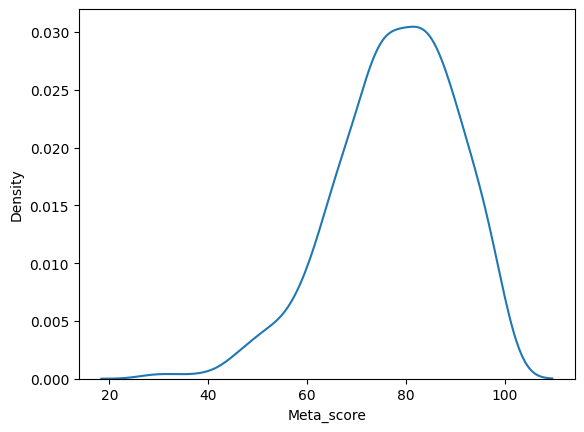

In [23]:
sns.kdeplot(df1['Meta_score'])

In [24]:
df1['Meta_score_mean_fill']=df1['Meta_score'].fillna(df1['Meta_score'].mean())
df1['Meta_score_median_fill']=df1['Meta_score'].fillna(df1['Meta_score'].median())

<Axes: xlabel='Meta_score_median_fill', ylabel='Density'>

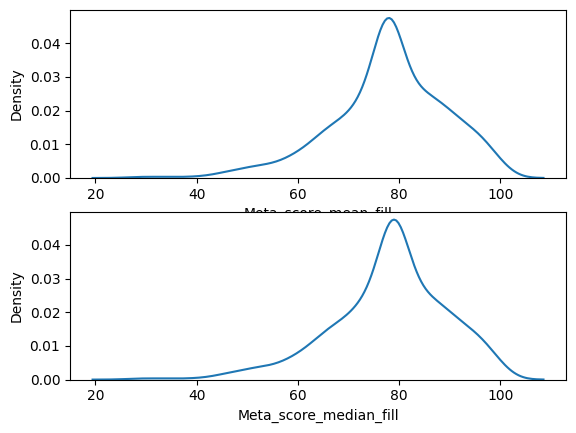

In [25]:
plt.subplot(2,1,1)
sns.kdeplot(df1['Meta_score_mean_fill'])
plt.subplot(2,1,2)
sns.kdeplot(df1['Meta_score_median_fill'])

In [26]:
df1['Meta_score']=df1['Meta_score'].fillna(df1['Meta_score'].median())
df1.drop(columns=['Meta_score_mean_fill','Meta_score_median_fill'],axis=1,inplace=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          831 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 74.3+ KB


### Fillung and transforming the Gross column

In [28]:
def remove_comma(data):
  return data.replace(',','').strip()

In [29]:
df1['Gross']=df1['Gross'].replace(np.nan,'0')
df1['Gross']=df1['Gross'].apply(remove_comma)
df1['Gross']=df1['Gross'].astype('int64')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          1000 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 74.3+ KB


In [31]:
splitted_cols= df1['Genre'].str.split(',',expand=True)
max_splits = splitted_cols.columns.size
column_names = [f"Genre_{i+1}" for i in range(max_splits)]
splitted_cols.columns = column_names
df1 = pd.concat([df1, splitted_cols], axis=1)
df1

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,2343110,28341469,Drama,None,None
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411,Crime,Drama,None
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444,Action,Crime,Drama
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000,Crime,Drama,None
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,166544,0,Comedy,Drama,Romance
996,Giant,1956,G,201,"Drama, Western",7.6,84.0,George Stevens,34075,0,Drama,Western,None
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,43374,30500000,Drama,Romance,War
998,Lifeboat,1944,Passed,97,"Drama, War",7.6,78.0,Alfred Hitchcock,26471,0,Drama,War,None


In [32]:
df1=df1.drop(columns=['Genre','Genre_2','Genre_3'])

In [33]:
df1.rename(columns={'Genre_1':'Genre'},inplace=True)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   int64  
 9   Genre          1000 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 74.3+ KB


## Univariate Analysis

In [35]:
for col in df1.columns:
  print(f'Number of unique values in {col} : {df[col].nunique()}')

Number of unique values in Series_Title : 999
Number of unique values in Released_Year : 100
Number of unique values in Certificate : 16
Number of unique values in Runtime : 140
Number of unique values in IMDB_Rating : 17
Number of unique values in Meta_score : 63
Number of unique values in Director : 548
Number of unique values in No_of_Votes : 999
Number of unique values in Gross : 823
Number of unique values in Genre : 202


In [36]:
df1.describe(include='all')

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Genre
count,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1.000000e+03,1.000000e+03,1000
unique,999,NaN,16,NaN,NaN,NaN,548,NaN,NaN,14
top,Drishyam,NaN,U,NaN,NaN,NaN,Alfred Hitchcock,NaN,NaN,Drama
freq,2,NaN,256,NaN,NaN,NaN,14,NaN,NaN,289
mean,NaN,1991.221000,NaN,122.891000,7.949300,78.133000,NaN,2.736929e+05,5.653688e+07,NaN
std,NaN,23.285669,NaN,28.093671,0.275491,11.368225,NaN,3.273727e+05,1.032382e+08,NaN
min,NaN,1920.000000,NaN,45.000000,7.600000,28.000000,NaN,2.508800e+04,0.000000e+00,NaN
25%,NaN,1976.000000,NaN,103.000000,7.700000,72.000000,NaN,5.552625e+04,4.457098e+05,NaN
50%,NaN,1999.000000,NaN,119.000000,7.900000,79.000000,NaN,1.385485e+05,1.070275e+07,NaN
75%,NaN,2009.000000,NaN,137.000000,8.100000,85.250000,NaN,3.741612e+05,6.153989e+07,NaN


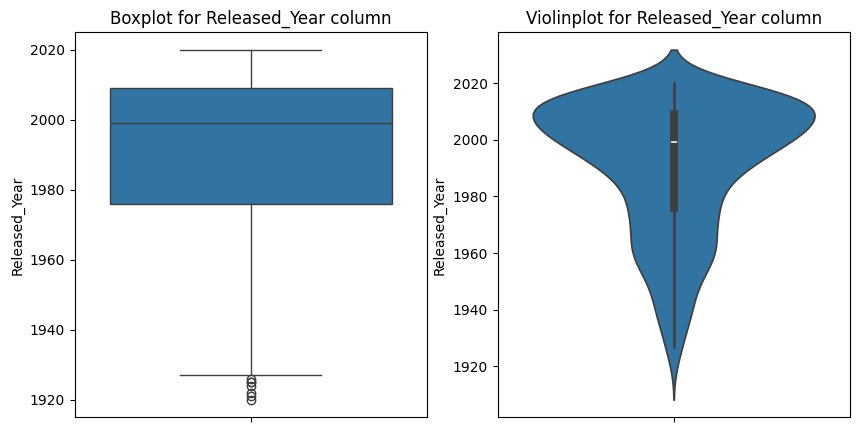

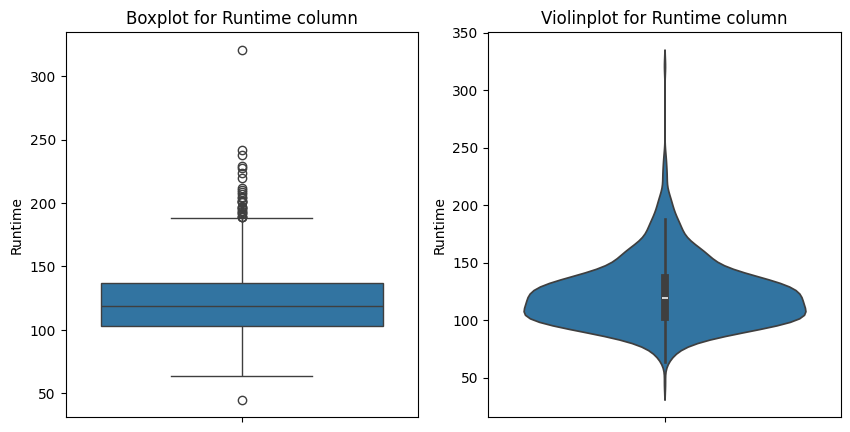

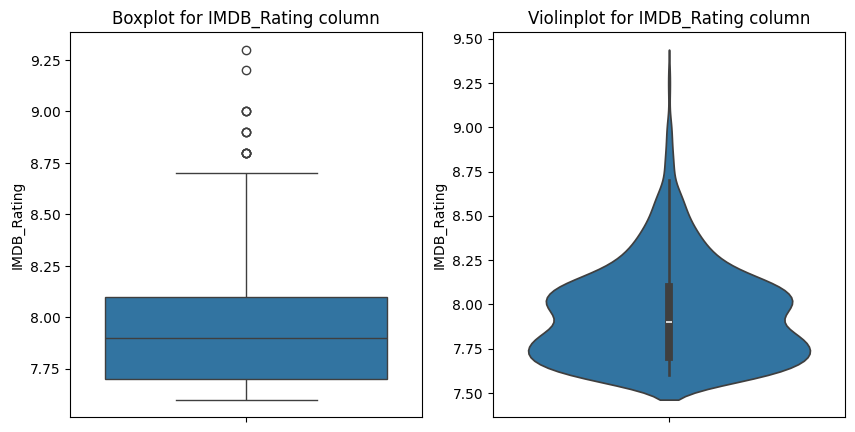

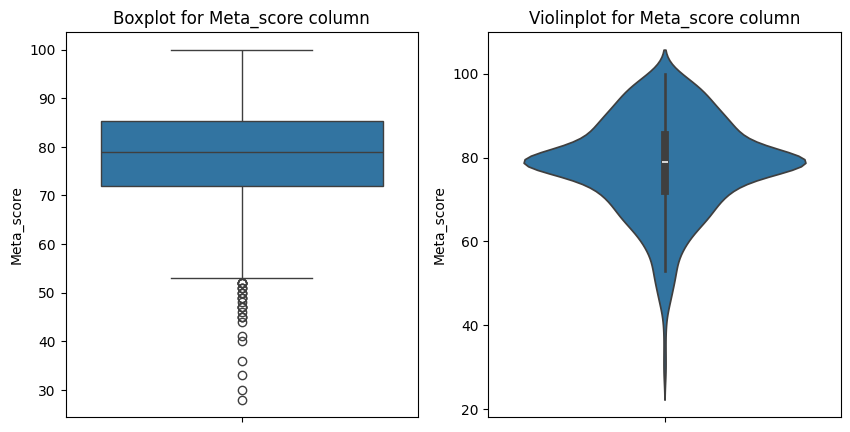

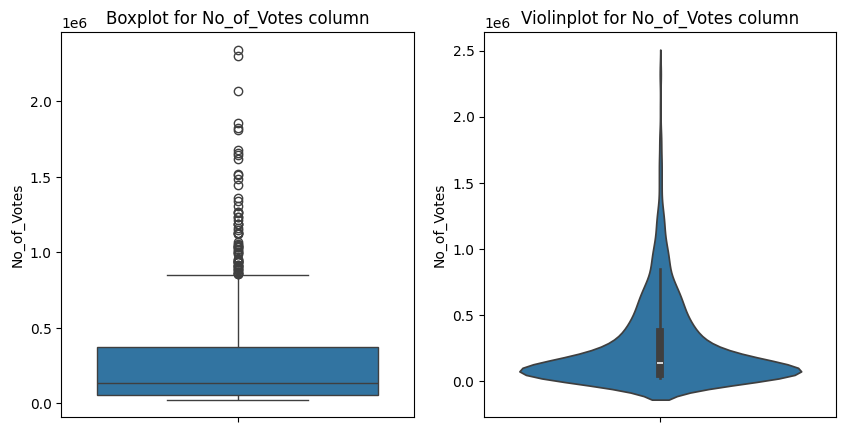

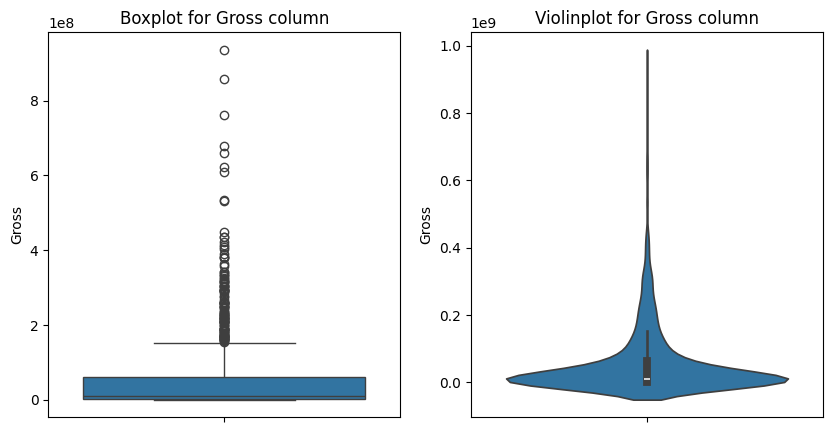

In [37]:
for col in df1.columns:
  if df1[col].dtype!=object:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'Boxplot for {col} column')
    sns.boxplot(df1[col])
    print('\t')
    plt.subplot(1,2,2)
    plt.title(f'Violinplot for {col} column')
    sns.violinplot(df1[col])
    plt.show()
    print('\n')

In [38]:
df1.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', 'Gross',
       'Genre'],
      dtype='object')

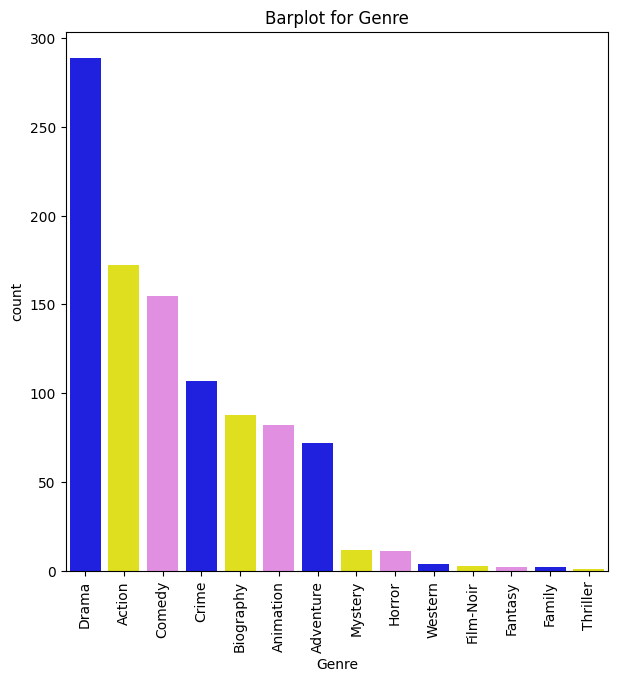

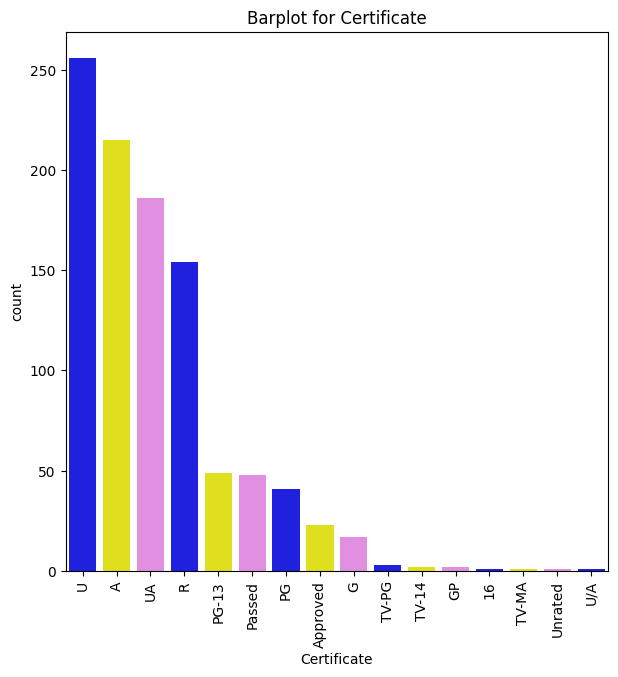

In [39]:
cols=['Genre','Certificate']
palette=['Blue','Yellow','Violet']
for col in cols:
  if df1[col].dtype is object or col!= 'Series_Title' or col!='Director':
    plt.figure(figsize=(7,7))
    plt.title(f'Barplot for {col}')
    plt.xticks(rotation=90)
    sns.countplot(data=df1,x=col,order=df1[col].value_counts().index,palette=palette)
    plt.show()
    print("\n")

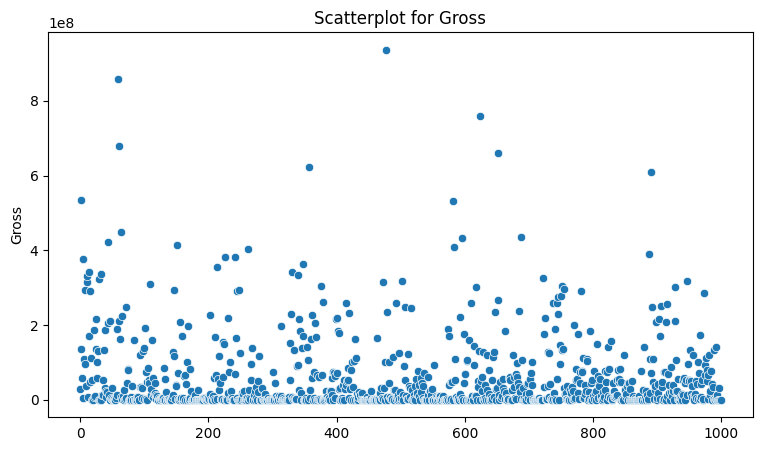

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Scatterplot for Gross')
sns.scatterplot(df1['Gross'])
plt.show()

## Bi-Variate Analysis

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   int64  
 9   Genre          1000 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 74.3+ KB


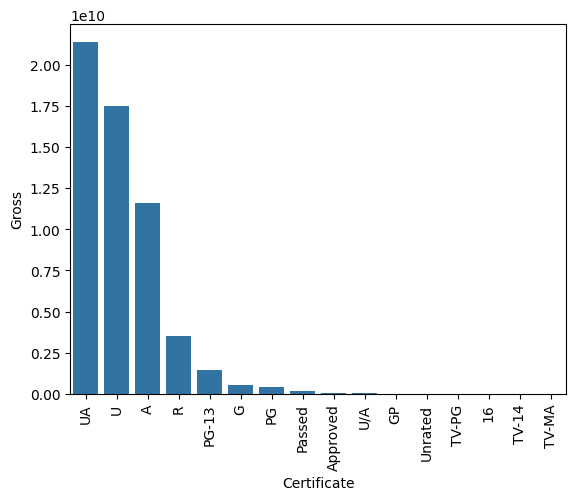

In [50]:
amount_by_certificate=df1.groupby('Certificate')['Gross'].sum()
amount_by_certificate=pd.DataFrame(amount_by_certificate)
amount_by_certificate.sort_values(by='Gross',ascending=False,inplace=True)
sns.barplot(amount_by_certificate,x='Certificate',y='Gross',order=amount_by_certificate.index)
plt.xticks(rotation=90)
plt.show()

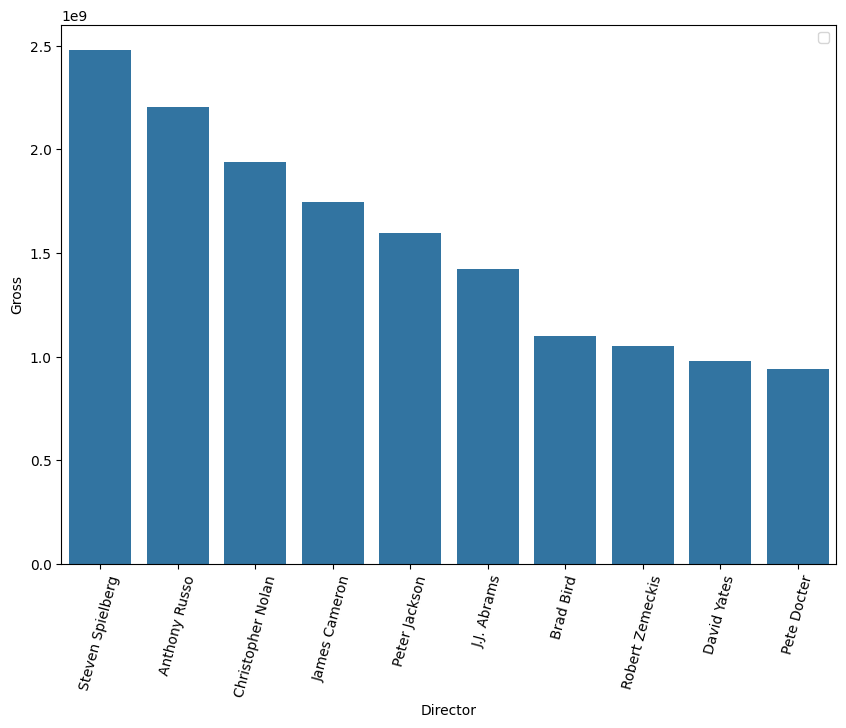

In [63]:
amount_by_director=df1.groupby('Director')['Gross'].sum()
amount_by_director=pd.DataFrame(amount_by_director)
amount_by_director.sort_values(by='Gross',ascending=False,inplace=True)
top_10_directors=amount_by_director.nlargest(n=10,columns=['Gross'])
plt.figure(figsize=(10,7))
sns.barplot(top_10_directors,x='Director',y='Gross')
plt.xticks(rotation=75)
plt.show()

## Multi-Variate Analysis

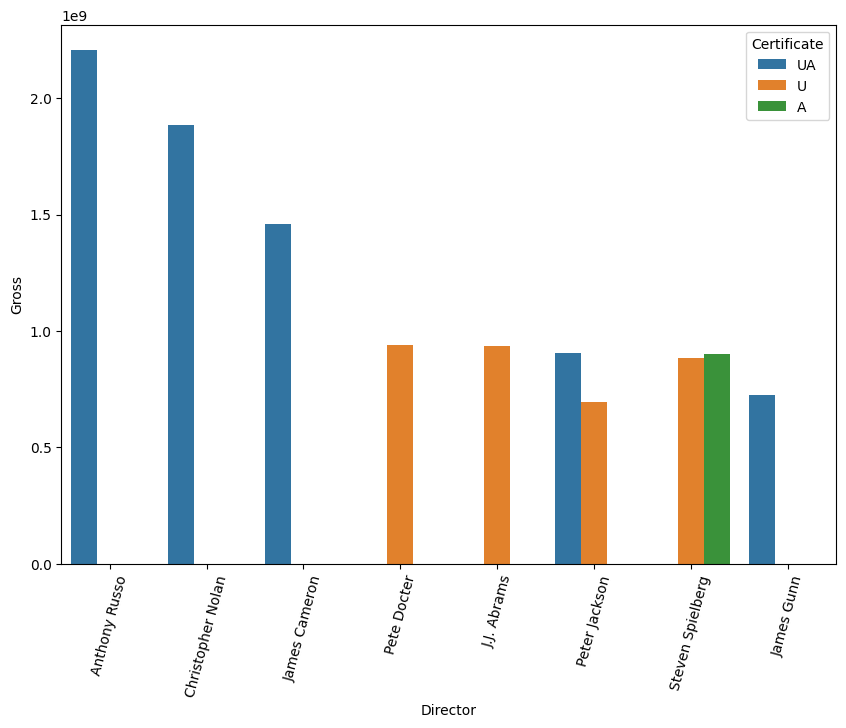

In [66]:
amount_by_director=df1.groupby(['Director','Certificate'])['Gross'].sum()
amount_by_director=pd.DataFrame(amount_by_director)
amount_by_director.sort_values(by='Gross',ascending=False,inplace=True)
top_10_directors=amount_by_director.nlargest(n=10,columns=['Gross'])
plt.figure(figsize=(10,7))
sns.barplot(top_10_directors,x='Director',y='Gross',hue='Certificate')
plt.xticks(rotation=75)
plt.show()